# Training

## Training with our own dataset

In [2]:
#Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load the data

In [3]:
#
path = "data/processed/groupby/stations_final_2024.csv"
df = pd.read_csv(path)
df

,index,station_id,month,day,hour,ctx_4,ctx_3,ctx_2,ctx_1,percentage_docks_available
0,0,1,1,1,5,0.781481,0.677778,0.696296,0.750000,0.757265
1,1,1,1,1,10,0.737374,0.711111,0.711111,0.731624,0.825926
2,2,1,1,1,15,0.827778,0.896296,0.901852,0.883333,0.857407
3,3,1,1,1,20,0.825926,0.874074,0.927778,0.918519,0.833333
4,4,1,1,2,1,0.712963,0.777778,0.814815,0.790741,0.800000
...,...,...,...,...,...,...,...,...,...,...
143017,143017,519,2,29,1,0.666667,0.628788,0.544872,0.486111,0.482639
143018,143018,519,2,29,6,0.458333,0.458333,0.465278,0.555556,0.659722
143019,143019,519,2,29,11,0.739583,0.940972,1.000000,0.944444,0.809028
143020,143020,519,2,29,16,0.795139,0.819444,0.888889,0.899306,0.975694


Ahora mismo hay algunas columnas con nan, las quitamos

In [4]:
df.dropna(inplace=True)

Renombramos porque en el dataset que nos han dado esta escrito con - en vez de _

In [5]:
df.rename(columns=lambda x: x.replace('ctx_', 'ctx-'), inplace=True)

In [6]:
df.columns

Index(['index', 'station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3',
       'ctx-2', 'ctx-1', 'percentage_docks_available'],
      dtype='object')

Seleccionamos las columnas para training, y la columna a predecir

In [7]:
X = df[['ctx-4', 'ctx-3', 'ctx-2', 'ctx-1']] # df[['station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3', 'ctx-2', 'ctx-1']]
y = df['percentage_docks_available']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,ctx-4,ctx-3,ctx-2,ctx-1
49972,0.254902,0.117647,0.117647,0.063725
64914,0.295238,0.252381,0.290476,0.257143
75131,0.709877,0.666667,0.666667,0.666667
2795,0.534884,0.534884,0.534884,0.534884
24451,0.609524,0.659524,0.771429,0.783333
...,...,...,...,...
110588,0.461806,0.510417,0.510417,0.475694
120224,0.479167,0.488426,0.479167,0.518519
103996,0.620690,0.620690,0.606322,0.514368
132313,0.715976,0.678322,0.650888,0.692308


In [14]:
y_train

49972     0.269608
64914     0.161905
75131     0.700337
2795      0.534884
24451     0.745238
            ...   
110588    0.430556
120224    0.504630
103996    0.298851
132313    0.692308
122309    0.688272
Name: percentage_docks_available, Length: 114088, dtype: float64

Visualizamos la distribucion de nuestros valores a predecir. Hay valores por encima de 1.

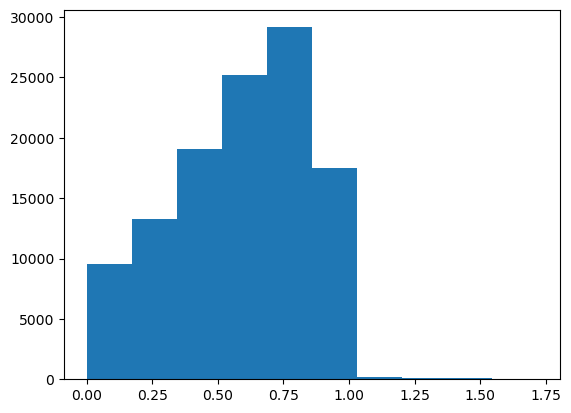

In [19]:
plt.hist(y_train)
plt.show()


Hay valores de ocupacion superiores a 1. Habria que corregirlo?

(array([137.,  58.,  61.,  47.,  59.,  49.,  35.,  11.,   4.,   5.]),
 array([1.00252525, 1.0740676 , 1.14560995, 1.21715229, 1.28869464,
        1.36023699, 1.43177933, 1.50332168, 1.57486402, 1.64640637,
        1.71794872]),
 <BarContainer object of 10 artists>)

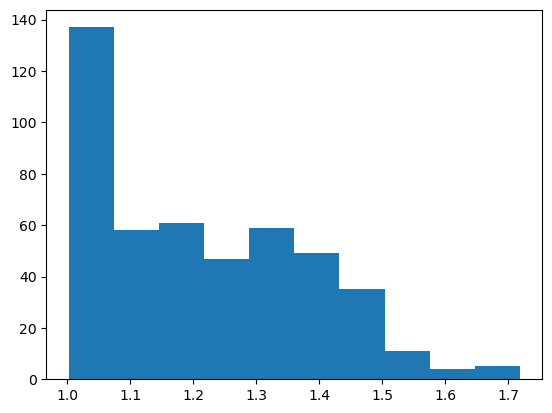

In [20]:
plt.hist(y_train[y_train>1])

Primer modelo, Linear Regression

In [71]:
ln_reg = LinearRegression()

ln_reg.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = ln_reg.predict(X_test)

Visualizamos el valor real de test vs el valor predicho

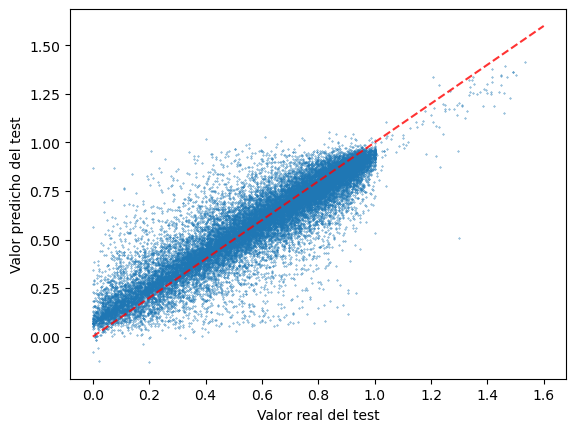

In [73]:
plt.scatter(y_test, y_pred, s=0.1)
plt.xlabel("Valor real del test")
plt.ylabel("Valor predicho del test")
plt.plot([0,1.6], [0,1.6], linestyle='--', color='red', alpha=.8)
plt.show()


In [74]:
score = r2_score(y_test, y_pred)
score

0.8214617197993144

## Testing their dataset

In [75]:
sample_submission_df = pd.read_csv("data/other/sample_submission_2024.csv")

In [76]:
sample_submission_df

,index,percentage_docks_available
0,0,0.228074
1,1,0.776294
2,2,0.485480
3,3,0.405185
4,4,0.773393
...,...,...
171897,171897,0.870746
171898,171898,0.874182
171899,171899,0.284646
171900,171900,0.684282


In [77]:
y_sample_pred = ln_reg.predict(X_sample)

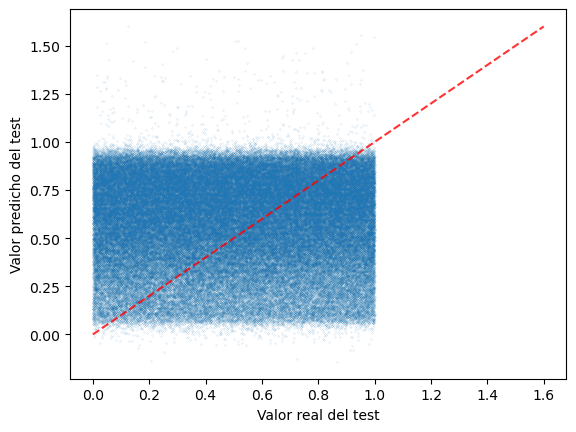

In [78]:
plt.scatter(y_sample, y_sample_pred, s=0.005)
plt.xlabel("Valor real del test")
plt.ylabel("Valor predicho del test")
plt.plot([0,1.6], [0,1.6], linestyle='--', color='red', alpha=.8)
plt.show()

In [79]:
score = r2_score(y_sample, y_sample_pred)
score

-0.7211508806400642

In [80]:
prediction_df = pd.DataFrame(y_sample_pred, columns=["percentage_docks_available"])
prediction_df.index.name="index"
prediction_df

,percentage_docks_available
index,
0,0.739117
1,0.718475
2,0.845655
3,0.876097
4,0.602203
...,...
171897,0.838404
171898,0.807035
171899,0.140367


In [81]:
prediction_df.to_csv("data/prediction/first_prediction.csv")

Mini observaciones:

    * No hay ningun valor predictivo
    
    * Nuestras predicciones tiene valores fuera del rango [0,1] mientras que el valor real no.
    

## Training with their dataset

In [84]:
metadata_sample_submission_df = pd.read_csv("data/other/metadata_sample_submission_2024.csv")

In [85]:
metadata_sample_submission_df

,index,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1
0,0,1,1,1,5,0.781481,0.677778,0.696296,0.750000
1,1,1,1,1,10,0.737374,0.711111,0.711111,0.731624
2,2,1,1,1,15,0.827778,0.896296,0.901852,0.883333
3,3,1,1,1,20,0.825926,0.874074,0.927778,0.918519
4,4,2,1,1,3,0.592593,0.341954,0.275862,0.540230
...,...,...,...,...,...,...,...,...,...
171897,171897,496,3,31,1,0.828704,0.787037,0.777778,0.853535
171898,171898,496,3,31,6,0.930556,0.944444,0.935185,0.856481
171899,171899,496,3,31,11,0.912037,0.884259,0.518519,0.157407
171900,171900,496,3,31,16,0.245370,0.319444,0.277778,0.305556


In [86]:
metadata_sample_submission_df.columns

Index(['index', 'station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3',
       'ctx-2', 'ctx-1'],
      dtype='object')

In [87]:
#X_sample = metadata_sample_submission_df[['station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3', 'ctx-2', 'ctx-1']]
X_sample = metadata_sample_submission_df[['ctx-4', 'ctx-3', 'ctx-2', 'ctx-1']]
y_sample = sample_submission_df['percentage_docks_available']

Creamos un dataframe con los resultados y lo guardamos

In [46]:
prediction_df.to_csv("data/prediction/first_prediction.csv")

### Con su dataset

In [68]:
path = "data/other/metadata_sample_submission_2024.csv"
df = pd.read_csv(path)

In [88]:
df

,index,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1
0,0,1,1,1,5,0.781481,0.677778,0.696296,0.750000
1,1,1,1,1,10,0.737374,0.711111,0.711111,0.731624
2,2,1,1,1,15,0.827778,0.896296,0.901852,0.883333
3,3,1,1,1,20,0.825926,0.874074,0.927778,0.918519
4,4,2,1,1,3,0.592593,0.341954,0.275862,0.540230
...,...,...,...,...,...,...,...,...,...
171897,171897,496,3,31,1,0.828704,0.787037,0.777778,0.853535
171898,171898,496,3,31,6,0.930556,0.944444,0.935185,0.856481
171899,171899,496,3,31,11,0.912037,0.884259,0.518519,0.157407
171900,171900,496,3,31,16,0.245370,0.319444,0.277778,0.305556


In [ ]:
TODO: 
    # provar solo con las variables de contexto: DONE
    # normalizar

In [91]:
df_pred = pd.read_csv("data/other/sample_submission_2024.csv")

In [92]:
df_pred

,index,percentage_docks_available
0,0,0.228074
1,1,0.776294
2,2,0.485480
3,3,0.405185
4,4,0.773393
...,...,...
171897,171897,0.870746
171898,171898,0.874182
171899,171899,0.284646
171900,171900,0.684282


In [112]:
X = df[['station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3',
       'ctx-2', 'ctx-1']]
y = df_pred['percentage_docks_available']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
ln_reg = LinearRegression()

ln_reg.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = ln_reg.predict(X_test)

In [117]:
y_pred

array([0.50247735, 0.50407047, 0.50001869, ..., 0.50519058, 0.50044558,
       0.50061389])

In [119]:
score = r2_score(y_test, y_pred)
score

-7.699263546823154e-05